In [26]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import SpatialDropout1D, LSTM, Dense
from keras.layers.embeddings import Embedding
from keras.callbacks.callbacks import EarlyStopping

In [2]:
%cd "../food_review/"

/mnt/c/Users/DarekChrostowski/Documents/TPG/food_review


In [3]:
%pwd

'/mnt/c/Users/DarekChrostowski/Documents/TPG/food_review'

In [11]:
df=pd.read_csv('Reviews.csv.gz')
df=df[['Text','Score']]
 
df.drop_duplicates(subset=['Score','Text'],keep='first',inplace=True) 
 
df=df.sample(frac=1).reset_index(drop=True)
 
review=df['Text']
rating=df['Score']
 
num_of_words=80000
max_len=250
 
tokenizer = Tokenizer(num_words=num_of_words,filters='!"#$%&amp;()*+,-./:;&lt;=>?@[\]^_`{|}~', lower=True)
 
tokenizer.fit_on_texts(review)
review_seq = tokenizer.texts_to_sequences(review)
 
review_seq_pad = pad_sequences(review_seq, maxlen=max_len)
 
train_x,test_x,train_y,test_y = train_test_split(review_seq_pad, rating, test_size=0.20, random_state=42)


In [28]:
epochs = 10
emb_dim = 128
batch_size = 256
 
model = Sequential()
model.add(Embedding(num_of_words, emb_dim, input_length=train_x.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 250, 128)          10240000  
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 250, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
Total params: 10,289,798
Trainable params: 10,289,798
Non-trainable params: 0
_________________________________________________________________
None


Train the model

In [29]:
history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss')])


/home/bidek/keras-env-3.7/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
Train on 251952 samples, validate on 62988 samples
Epoch 1/10
251952/251952 [==============================] - 768s 3ms/step - loss: 0.9358 - acc: 0.6687 - val_loss: 0.8050 - val_acc: 0.7009
Epoch 2/10
251952/251952 [==============================] - 704s 3ms/step - loss: 0.7870 - acc: 0.7067 - val_loss: 0.7609 - val_acc: 0.7144
Epoch 3/10
251952/251952 [==============================] - 708s 3ms/step - loss: 0.7360 - acc: 0.7241 - val_loss: 0.7396 - val_acc: 0.7228
Epoch 4/10
251952/251952 [==============================] - 710s 3ms/step - loss: 0.7011 - acc: 0.7351 - val_loss: 0.7351 - val_acc: 0.7228
Epoch 5/10
251952/251952 [==============================] - 722s 3ms/step - loss: 

In [32]:
score = model.evaluate(test_x, test_y, verbose=1)

78735/78735 [==============================] - 94s 1ms/step


In [33]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])


Test Score: 0.7272383511857532
Test Accuracy: 0.7287102341651917


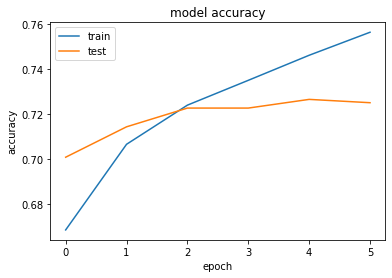

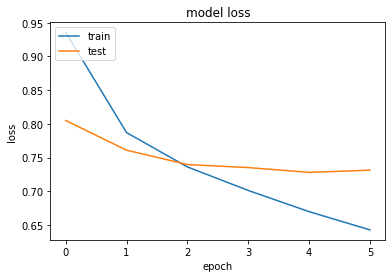

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


In [30]:
model.save('Food_Reviews.h5')

In [31]:
import pickle
 
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)